In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Data.csv')
ncap = pd.read_csv('NCAP_Funding.csv')
state = pd.read_csv('State_data.csv')

In [5]:
data

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [6]:
ncap

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


In [7]:
state

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


# Spatial Aggregation

In [8]:
#Q1
avg = data.groupby('state')['PM2.5'].mean()
print(avg.idxmax(), avg.max())

Delhi 104.1009176780069


In [9]:
#Q2
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data2023 = data[data['Timestamp'].dt.year == 2023]

hazardDays = data2023.groupby(['state','Timestamp'])['PM2.5'].max().reset_index()
hazrad = hazardDays[hazardDays['PM2.5'] > 300]
hazradCount = hazrad.groupby('state').size()
print(hazradCount.idxmax(), hazradCount.max())

Delhi 49


In [10]:
#Q3
variablity = data.groupby('state')['PM2.5'].std()
print(variablity.idxmax(), variablity.max())

Delhi 84.55345160960931


In [11]:
#Q4
covidData = data[(data['Timestamp'].dt.year >= 2020) & (data['Timestamp'].dt.year <= 2021)].copy()
avg = covidData.groupby('state')['PM2.5'].mean()
print(avg.idxmin(), avg.min())

Mizoram 14.323350150801287


# Temporal Aggregation

In [12]:
#Q1
august2020 = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)].copy()
highest_station = august2020.loc[august2020['PM2.5'].idxmax()]
print(highest_station['station'])

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


In [13]:
#Q2
data2018 = data[data['Timestamp'].dt.year == 2018].copy()

stations = ['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
data2018 = data2018[data2018['station'].isin(stations)]

def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Other'

data2018['Season'] = data2018['Timestamp'].apply(get_season)
avgBySeason = data2018.groupby('Season')['PM2.5'].mean()
print(avgBySeason.idxmax(), avgBySeason.max())

Winter 67.4923443634478


Some seasons are generally more polluted because of the human response it causes, eg: Using Fire for warmth in Winter

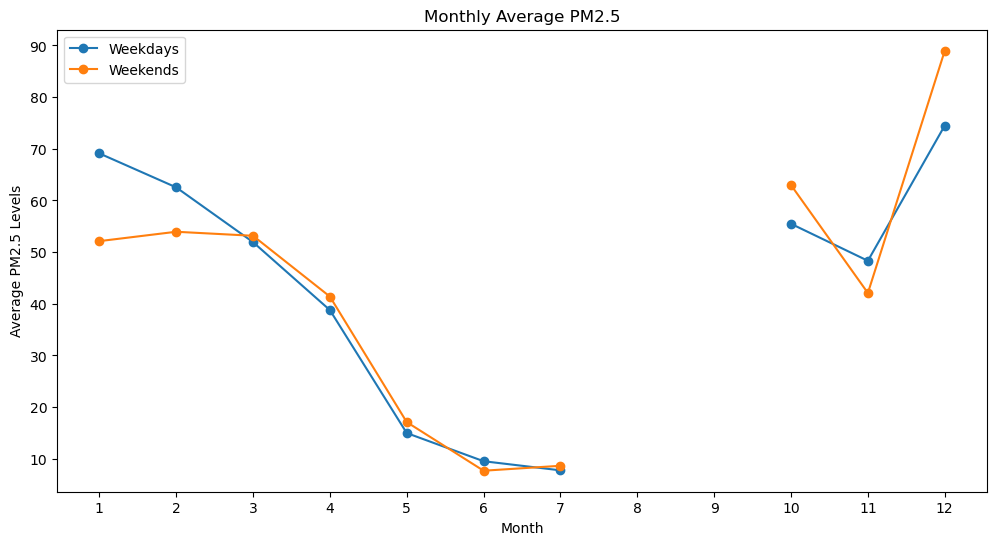

In [14]:
#Q3
data2021 = data[(data['Timestamp'].dt.year == 2021) & (data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')].copy()

data2021['DayOfWeek'] = data2021['Timestamp'].dt.dayofweek

data2021['Weekend'] = data2021['DayOfWeek'] >= 5

data2021['Month'] = data2021['Timestamp'].dt.month
weekdays = data2021[~data2021['Weekend']].groupby('Month')['PM2.5'].mean()
weekend = data2021[data2021['Weekend']].groupby('Month')['PM2.5'].mean()

plt.figure(figsize=(12, 6))
plt.plot(weekdays.index, weekdays.values, label='Weekdays', marker='o')
plt.plot(weekend.index, weekend.values, label='Weekends', marker='o')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.title('Monthly Average PM2.5')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

# Spatio-temporal aggregation

In [15]:
#Q1
data2022 = data[data['Timestamp'].dt.year == 2022].copy()
data2022['Season'] = data2022['Timestamp'].apply(get_season)

summerAvg = data2022[data2022['Season'] == 'Summer'].groupby('state')['PM2.5'].mean()
monsoonAvg = data2022[data2022['Season'] == 'Monsoon'].groupby('state')['PM2.5'].mean()

percentChange = ((monsoonAvg - summerAvg) / summerAvg) * 100
diffState = percentChange.abs().idxmax()
diffVal = percentChange[diffState]
print(diffState, diffVal)

Assam -61.17641855538734


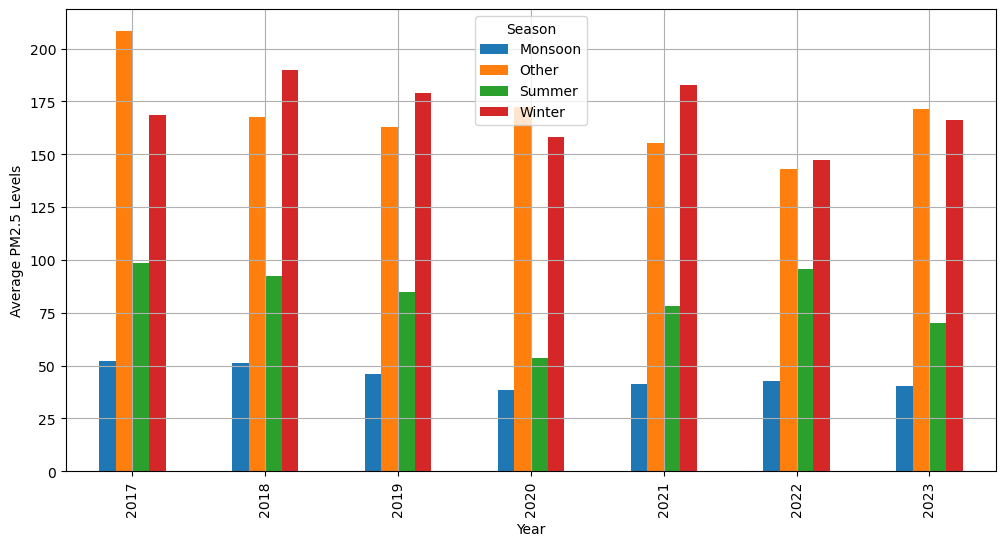

In [16]:
#Q2
dataDelhi = data[data['state'] == 'Delhi'].copy()
dataDelhi['Season'] = dataDelhi['Timestamp'].apply(get_season)
dataDelhi['Year'] = dataDelhi['Timestamp'].dt.year

dataDelhi = dataDelhi[(dataDelhi['Year'] >= 2017) & (dataDelhi['Year'] <= 2023)]

seasonalAvg = dataDelhi.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()

seasonalAvg.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.legend(title='Season')
plt.grid(True)
plt.show()

Typically, PM2.5 levels are higher in winter due to temperature inversions, increased heating, and stagnant air.

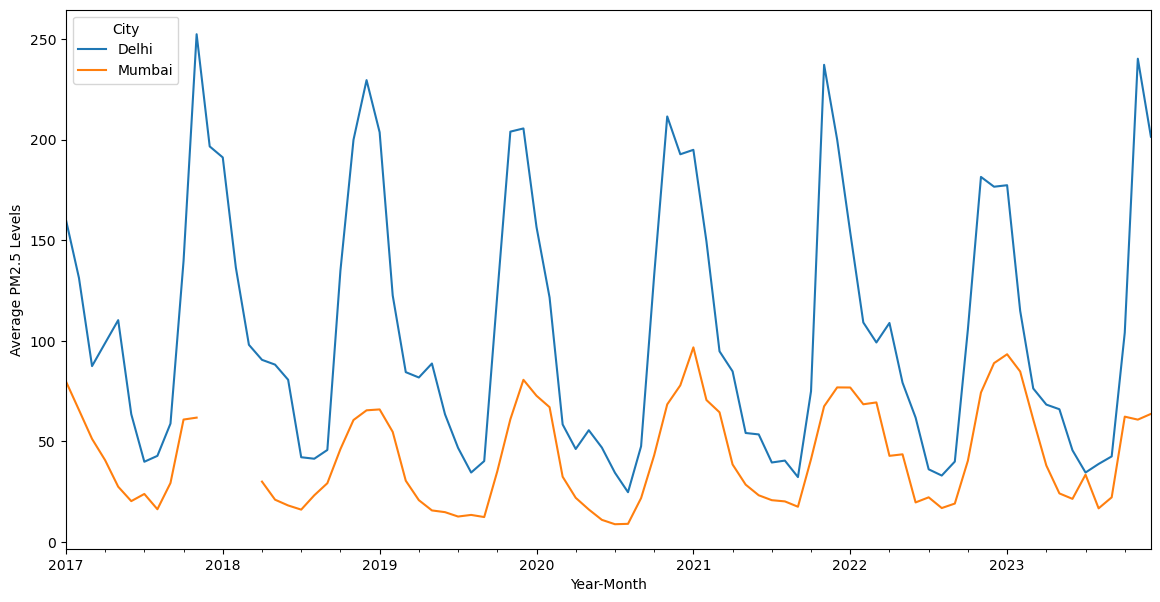

In [17]:
#Q3
dataCity = data[(data['city'] == 'Delhi') | (data['city'] == 'Mumbai')].copy()

dataCity = dataCity[(dataCity['Timestamp'].dt.year >= 2015) & (dataCity['Timestamp'].dt.year <= 2023)]

dataCity['Month'] = dataCity['Timestamp'].dt.to_period('M')
monthly_avg = dataCity.groupby(['Month', 'city'])['PM2.5'].mean().unstack()

plt.figure(figsize=(14, 7))
monthly_avg.plot(ax=plt.gca())
plt.xlabel('Year-Month')
plt.ylabel('Average PM2.5 Levels')
plt.legend(title='City')
plt.show()

Delhi has more fluctuations

# Population-Based

In [18]:
#Q1
data_path = "Data.csv"
state_data_path = "State_data.csv"
data_df = pd.read_csv(data_path)
state_data_df = pd.read_csv(state_data_path)
data_df.head(), state_data_df.head()
stations_per_state = data_df.groupby("state")["station"].nunique().reset_index()
stations_per_state.columns = ["State", "Station_Count"]
merged_df = stations_per_state.merge(state_data_df, on="State")
merged_df["Stations_per_Capita"] = merged_df["Station_Count"] / merged_df["Population"]
top_state = merged_df.loc[merged_df["Stations_per_Capita"].idxmax(), ["State", "Stations_per_Capita"]]
top_state.describe()

count              2
unique             2
top       Chandigarh
freq               1
Name: 4, dtype: object

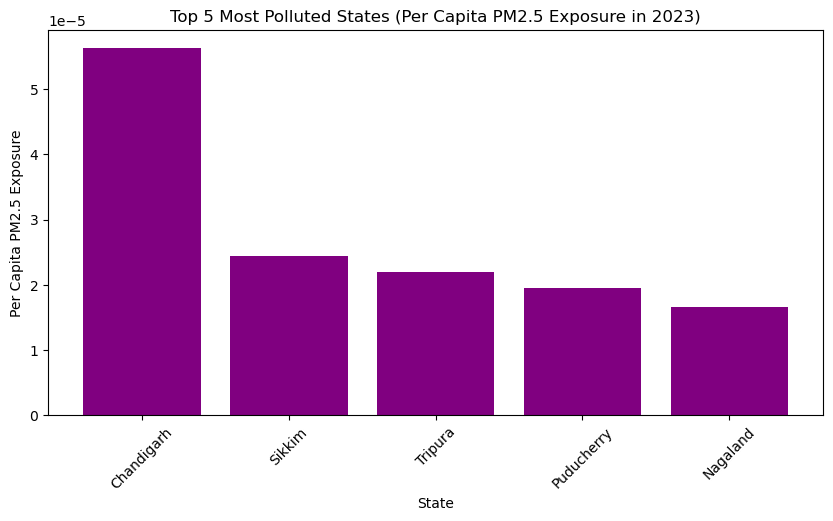

In [19]:
#Q2
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")

data_2023 = data_df[data_df["Timestamp"].dt.year == 2023]

pm25_per_state = data_2023.groupby("state")["PM2.5"].mean().reset_index()

pm25_per_state.columns = ["State", "Avg_PM2.5"]

pm25_merged_df = pm25_per_state.merge(state_data_df, on="State")

pm25_merged_df["PM2.5_per_Capita"] = pm25_merged_df["Avg_PM2.5"] / pm25_merged_df["Population"]

top_5_pm25_states = pm25_merged_df.nlargest(5, "PM2.5_per_Capita")

plt.figure(figsize=(10, 5))
plt.bar(top_5_pm25_states["State"], top_5_pm25_states["PM2.5_per_Capita"], color="purple")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure in 2023)")
plt.xticks(rotation=45)
plt.show()

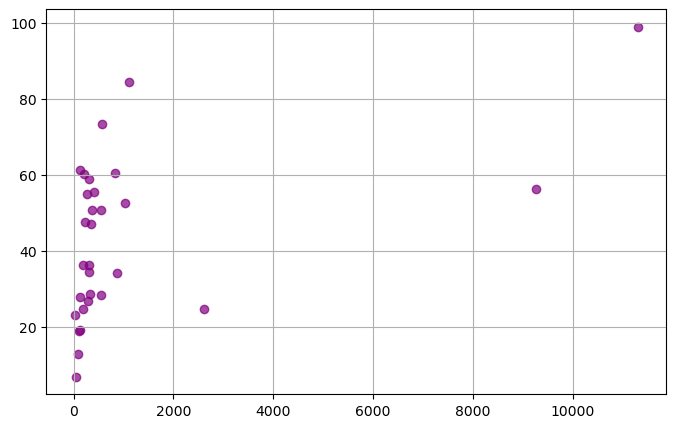

In [20]:
#Q3
data_path = "Data.csv"
state_data_path = "State_data.csv"

data_df = pd.read_csv(data_path)
state_data_df = pd.read_csv(state_data_path)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")

data_2022 = data_df[data_df["Timestamp"].dt.year == 2022]
pm25_per_state = data_2022.groupby("state")["PM2.5"].mean().reset_index()
pm25_per_state.columns = ["State", "Avg_PM2.5"]

state_data_df["Population_Density"] = state_data_df["Population"] / state_data_df["Area (km2)"]

density_pm25_df = pm25_per_state.merge(state_data_df[["State", "Population_Density"]], on="State")

density_pm25_df = density_pm25_df.replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8, 5))
plt.scatter(density_pm25_df["Population_Density"], density_pm25_df["Avg_PM2.5"], color="purple", alpha=0.7)

plt.grid(True)

plt.show()

# Area Based

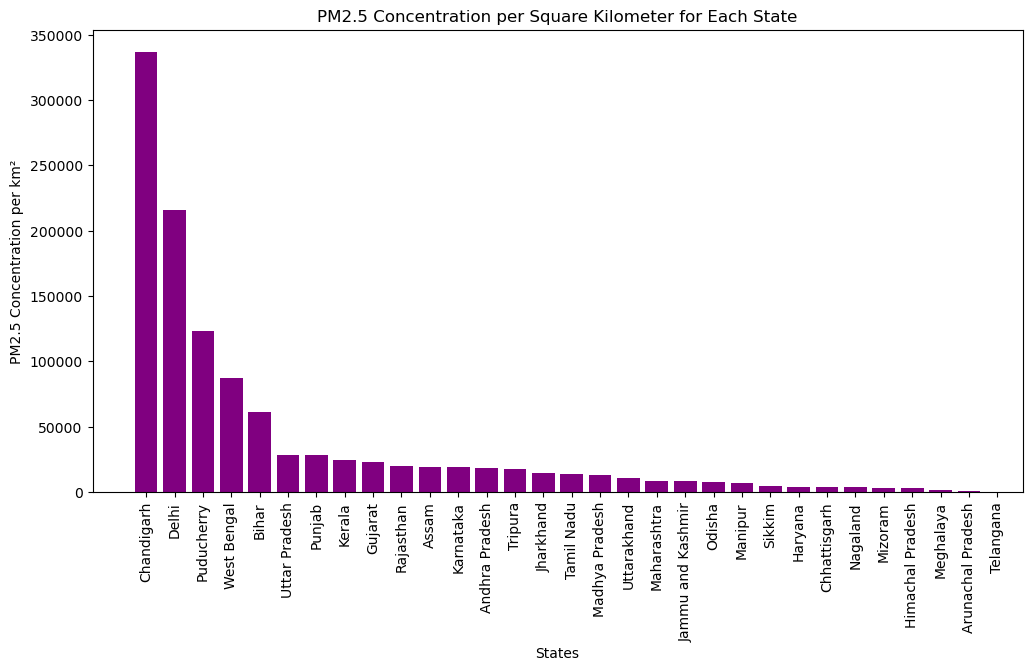

State               Chandigarh
PM2.5_per_km2    337013.096346
Name: 29, dtype: object

In [21]:
#Q1
state_data_df["PM2.5_per_km2"] = state_data_df["Population"] * density_pm25_df["Avg_PM2.5"] / state_data_df["Area (km2)"]
state_data_sorted = state_data_df.sort_values(by="PM2.5_per_km2", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(state_data_sorted["State"], state_data_sorted["PM2.5_per_km2"], color="purple")
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per km²")
plt.title("PM2.5 Concentration per Square Kilometer for Each State")

plt.show()

highest_pm25_state = state_data_sorted.iloc[0][["State", "PM2.5_per_km2"]]
highest_pm25_state

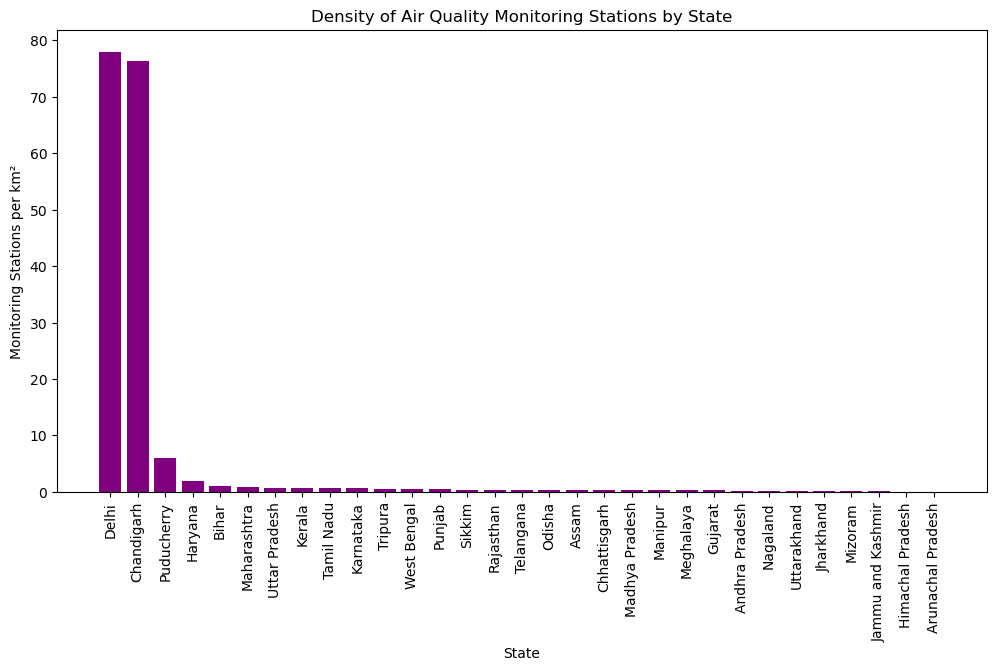

State                    Delhi
Number of Stations      115695
Population            16787941
Area (km2)                1484
Station Density       77.96159
Name: 4, dtype: object


In [22]:
#Q2
state_data_path = "State_data.csv"
data_path = "Data.csv"

state_data = pd.read_csv(state_data_path)
data = pd.read_csv(data_path)

station_counts = data["state"].value_counts().reset_index()
station_counts.columns = ["State", "Number of Stations"]

merged_data = pd.merge(station_counts, state_data, on="State")

merged_data["Station Density"] = merged_data["Number of Stations"] / merged_data["Area (km2)"]

merged_data = merged_data.sort_values(by="Station Density", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(merged_data["State"], merged_data["Station Density"], color='purple')
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Monitoring Stations per km²")
plt.title("Density of Air Quality Monitoring Stations by State")
plt.show()

highest_density_state = merged_data.iloc[0]
print(highest_density_state)

State Data Columns: Index(['state', 'population', 'area (km2)'], dtype='object')
Air Quality Data Columns: Index(['timestamp', 'station', 'pm2.5', 'pm10', 'address', 'city', 'latitude',
       'longitude', 'state'],
      dtype='object')


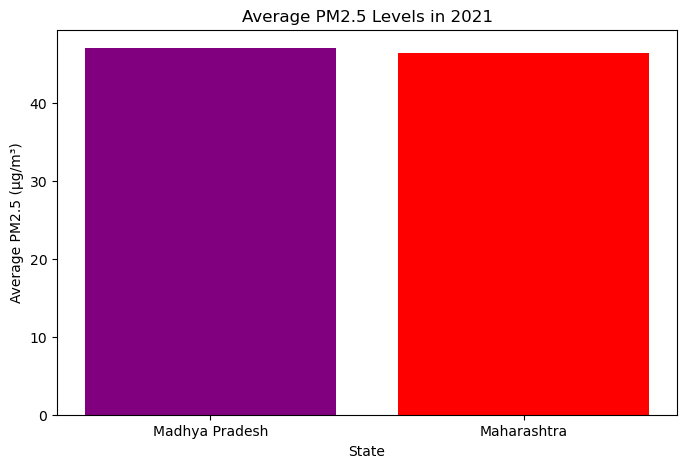

            state      pm2.5  population  area (km2)  population density
0  Madhya Pradesh  47.095952    72626809      308252          235.608557
1     Maharashtra  46.440044   112374333      307713          365.192023


In [23]:
#Q3
state_data_path = "State_data.csv"
data_path = "Data.csv"

state_data = pd.read_csv(state_data_path)
data = pd.read_csv(data_path)

state_data.columns = state_data.columns.str.strip().str.lower()
data.columns = data.columns.str.strip().str.lower()

print("State Data Columns:", state_data.columns)
print("Air Quality Data Columns:", data.columns)

if "timestamp" in data.columns:
    data["timestamp"] = pd.to_datetime(data["timestamp"], errors='coerce')
    data = data.dropna(subset=["timestamp"])
else:
    raise KeyError("Timestamp column not found in the dataset.")

data_2021 = data[data["timestamp"].dt.year == 2021]

if "state" in data_2021.columns:
    data_2021 = data_2021.dropna(subset=["state"])
else:
    raise KeyError("state coulumn not found in the dataset")

states_of_interest = ["Maharashtra", "Madhya Pradesh"]
filtered_data = data_2021[data_2021["state"].isin(states_of_interest)]

if "pm2.5" in filtered_data.columns:
    average_pm25 = filtered_data.groupby("state")["pm2.5"].mean().dropna()
else:
    raise KeyError("PM2.5 column not found in the dataset.")

if "state" in state_data.columns and "population" in state_data.columns and "area (km2)" in state_data.columns:
    state_population_density = state_data[state_data["state"].isin(states_of_interest)].copy()  # Ensure copy
    state_population_density.loc[:, "population density"] = state_population_density["population"] / state_population_density["area (km2)"]
else:
    raise KeyError("One or more required columns (state, population, area (km2)) not found in the state dataset.")

comparison_data = pd.merge(average_pm25.reset_index(), state_population_density, on="state", how="inner")

plt.figure(figsize=(8, 5))
plt.bar(comparison_data["state"], comparison_data["pm2.5"], color=['purple', 'red'])
plt.xlabel("State")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Average PM2.5 Levels in 2021")
plt.show()

print(comparison_data)

# Funding Based

state
Assam           61.017780
Chhattisgarh    24.863968
Gujarat         50.780194
Jharkhand             NaN
Meghalaya       12.197489
Punjab          51.940080
Rajasthan       61.923695
Tamil Nadu      28.896307
West Bengal     59.391918
Name: PM2.5, dtype: float64
state
Andhra Pradesh       33.316491
Bihar                81.967836
Chandigarh           44.360885
Delhi               105.401629
Himachal Pradesh           NaN
Karnataka            26.745015
Madhya Pradesh       47.095952
Maharashtra          46.440044
Nagaland             33.437906
Odisha               37.812390
Telangana            39.646620
Uttar Pradesh        82.596457
Uttarakhand                NaN
Name: PM2.5, dtype: float64


<Figure size 1000x600 with 0 Axes>

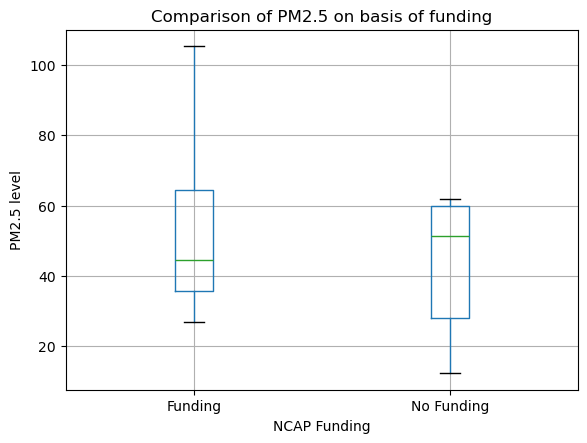

In [24]:
#Q1
data = pd.read_csv("Data.csv")
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data["Year"] = data["Timestamp"].dt.year
data_2021 = data[data["Year"] == 2021]
dataa = pd.read_csv("NCAP_Funding.csv")
dataa["Amount released during FY 2021-22"] = dataa["Amount released during FY 2021-22"].replace("-",0)
dataa["Amount released during FY 2021-22"] = dataa["Amount released during FY 2021-22"].astype(np.float16)
new = dataa.groupby("State")["Amount released during FY 2021-22"].sum().reset_index()
fundyes = new[new["Amount released during FY 2021-22"]>0]["State"]
fundno = new[new["Amount released during FY 2021-22"]==0]["State"].to_list()
dat = data_2021.groupby("state")["PM2.5"].mean()
d = dat[dat.index.isin(fundno)]
d1 = dat[dat.index.isin(fundyes)]
print(d)
print(d1)
comparison = pd.DataFrame({
    'State': d.index.tolist() + d1.index.tolist(),
    'PM2.5': d.tolist() + d1.tolist(),
    'Funding': ['No Funding'] * len(d) + ['Funding'] * len(d1)
})
plt.figure(figsize=(10, 6))
comparison.boxplot(column='PM2.5', by='Funding')
plt.suptitle('')
plt.title('Comparison of PM2.5 on basis of funding')
plt.xlabel('NCAP Funding')
plt.ylabel('PM2.5 level')
plt.show()

State                              index                 Assam
0      Amount released during FY 2019-20  0.120.060.060.060.06
1      Amount released during FY 2020-21                 52122
2      Amount released during FY 2021-22                 -----


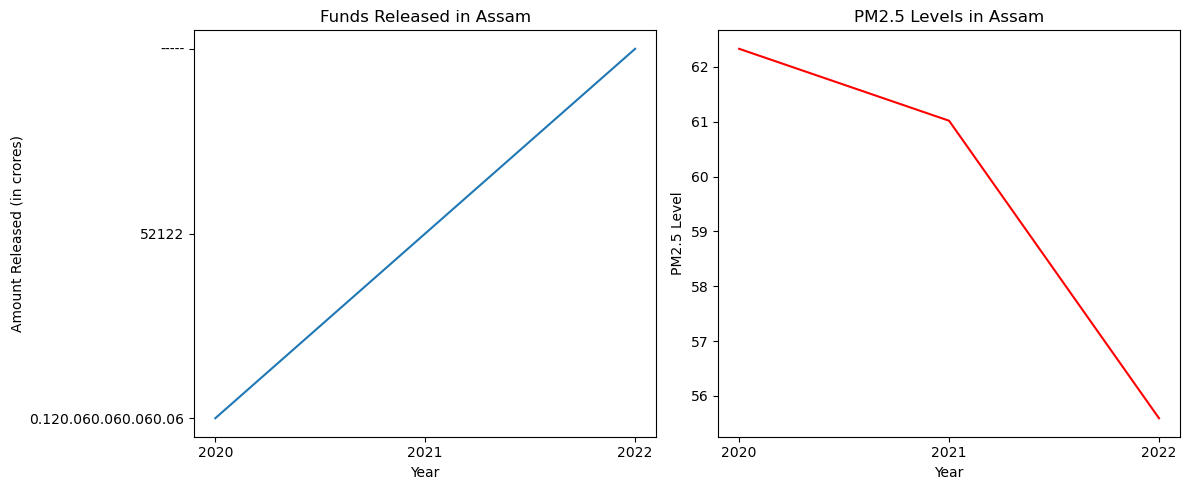

In [25]:
#Q2
df_fund = pd.read_csv("NCAP_Funding.csv")
df = data.copy()
totalfunds = pd.DataFrame(df_fund.groupby("State")[["Amount released during FY 2019-20","Amount released during FY 2020-21","Amount released during FY 2021-22"	]].sum()).reset_index()
assamfunds = (totalfunds[totalfunds["State"] == "Assam"])
assamfunds = assamfunds.T
assamfunds.columns = assamfunds.iloc[0]
assamfunds = assamfunds[1:].reset_index()
assam_main = df[df["state"] == "Assam"]
print(assamfunds)
assam_main = assam_main.copy()

assam_main["Timestamp"] = pd.to_datetime(assam_main["Timestamp"])

assam_main['Year'] = assam_main['Timestamp'].dt.year
assam_yearwise = pd.DataFrame(assam_main.groupby("Year")["PM2.5"].mean()).reset_index()
assam_yearwise = assam_yearwise[(assam_yearwise["Year"] >= 2020) & (assam_yearwise["Year"] <= 2022)].reset_index(drop = True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(assam_yearwise["Year"], assamfunds["Assam"])
axes[0].set_title("Funds Released in Assam")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Amount Released (in crores)")
axes[0].set_xticks(assam_yearwise["Year"])

axes[1].plot(assam_yearwise["Year"], assam_yearwise["PM2.5"], color='r')
axes[1].set_title("PM2.5 Levels in Assam")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PM2.5 Level")
axes[1].set_xticks(assam_yearwise["Year"])

plt.tight_layout()
plt.show()

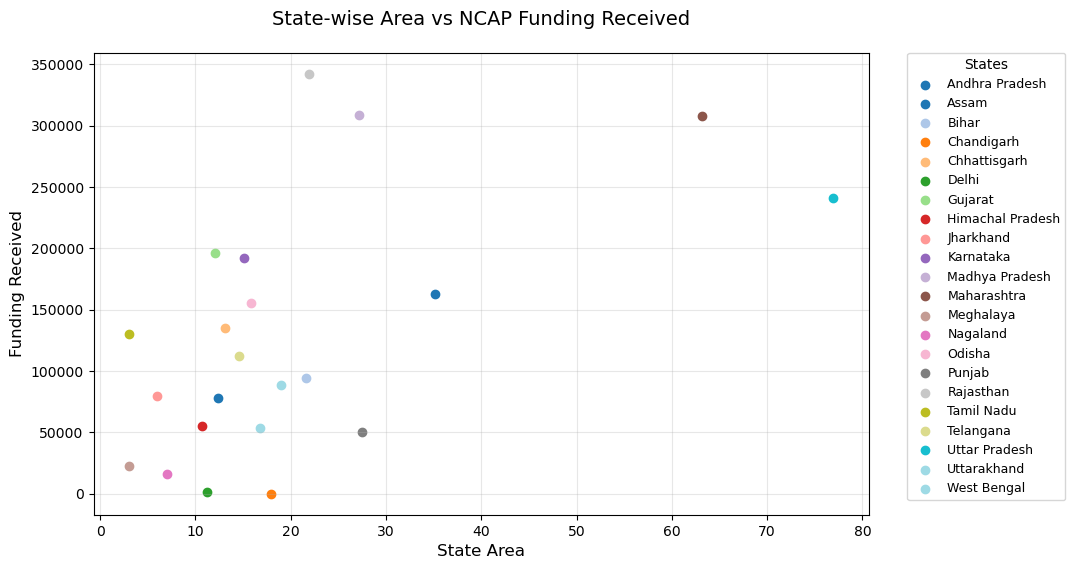

In [26]:
#Q3
State_Data = pd.read_csv('State_data.csv')
State_NCAP = pd.merge(state, ncap, on='State')
NCAP_Funding = State_NCAP.groupby('State').agg({'Total fund released': lambda x: x.replace('-', '0').astype(float).sum()}).reset_index()
State_NCAP = pd.merge(State_Data, NCAP_Funding, on='State')

State_NCAP_area_fund = State_NCAP.groupby('State').agg({'Area (km2)': 'sum', 'Total fund released': lambda x: x.replace('-', '0').astype(float).sum()}).reset_index()
states = State_NCAP_area_fund['State'].unique()

cmap = plt.get_cmap('tab20',len(states))

plt.figure(figsize=(10, 6))
for i,state in enumerate(states):
    plt.scatter(State_NCAP_area_fund[State_NCAP_area_fund['State'] == state]['Total fund released'],
                State_NCAP_area_fund[State_NCAP_area_fund['State'] == state]['Area (km2)'] ,
                color=cmap(i),
                label=state)
plt.xlabel('State Area', fontsize=12)
plt.ylabel('Funding Received', fontsize=12)
plt.title('State-wise Area vs NCAP Funding Received', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    title='States',
    fontsize=9
)
plt.show()

# Miscellaneous Questions

In [27]:
#Q1
data = pd.read_csv("Data.csv")
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data["year"] = data["Timestamp"].dt.year
data_2023 = data[data["year"] == 2023]
data_2023.dropna()
name = data_2023.groupby("city")["PM2.5"].mean().idxmax()
newdata = data_2023[data_2023["city"] == name]
counting = newdata[newdata["PM2.5"]>300]["Timestamp"].count()
percentage = (counting/365.0)*100
print(percentage)

0.821917808219178


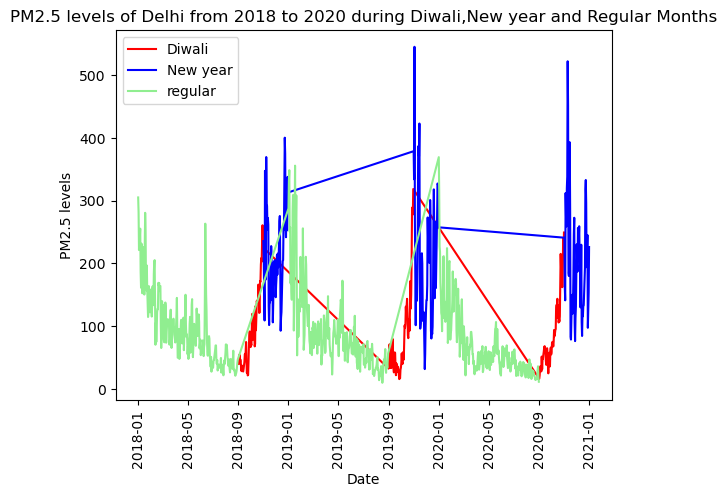

In [28]:
#Q2
df = data.copy()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2018_2020 = df[(df['Timestamp'].dt.year == 2018)|(df['Timestamp'].dt.year == 2019)|(df['Timestamp'].dt.year == 2020)]
df_delhi_18_20 = df_2018_2020[df_2018_2020['state'] == 'Delhi']
df_delhi_18_20 = pd.DataFrame(df_delhi_18_20.groupby(df['Timestamp'].dt.date)['PM2.5'].mean()).reset_index()
df_delhi_18_20['Timestamp'] = pd.to_datetime(df_delhi_18_20['Timestamp'])

df_diw = df_delhi_18_20[(df_delhi_18_20['Timestamp'].dt.month == 9) | (df_delhi_18_20['Timestamp'].dt.month == 10)]
df_ny = df_delhi_18_20[(df_delhi_18_20['Timestamp'].dt.month == 11) | (df_delhi_18_20['Timestamp'].dt.month == 12)]
df_reg = df_delhi_18_20[(df_delhi_18_20['Timestamp'].dt.month != 9) & (df_delhi_18_20['Timestamp'].dt.month != 10)&(df_delhi_18_20['Timestamp'].dt.month != 11) & (df_delhi_18_20['Timestamp'].dt.month != 12)]


x_1 = list(df_diw['Timestamp'])
y_1 = list(df_diw['PM2.5'])

x_2 = list(df_ny['Timestamp'])
y_2 = list(df_ny['PM2.5'])

x_3 = list(df_reg['Timestamp'])
y_3 = list(df_reg['PM2.5'])



plt.plot(x_1,y_1,label = 'Diwali',color = 'Red')
plt.plot(x_2,y_2,label = 'New year',color = 'Blue')
plt.plot(x_3,y_3,label = 'regular',color = 'lightgreen')
plt.xticks(rotation = 90)
plt.legend()
plt.title('PM2.5 levels of Delhi from 2018 to 2020 during Diwali,New year and Regular Months')
plt.xlabel('Date')
plt.ylabel('PM2.5 levels')


plt.show()

Assam


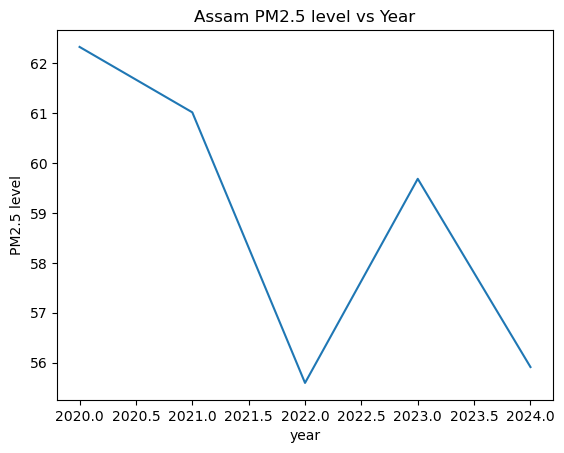

In [29]:
#Q3
data = pd.read_csv("NCAP_Funding.csv")
dataa = pd.read_csv("Data.csv")
name = data.groupby("State")["Amount released during FY 2020-21"].sum().idxmax()
print(name)
dataa["Timestamp"] = pd.to_datetime(dataa["Timestamp"], errors="coerce")
dataa["year"] = dataa["Timestamp"].dt.year
dataa_years = dataa[(dataa["year"] >= 2020) & (dataa["state"] == "Assam")]
dat = dataa_years.groupby("year")["PM2.5"].mean()
dat.plot(kind = "line")
plt.ylabel("PM2.5 level")
plt.title("Assam PM2.5 level vs Year")
plt.show()

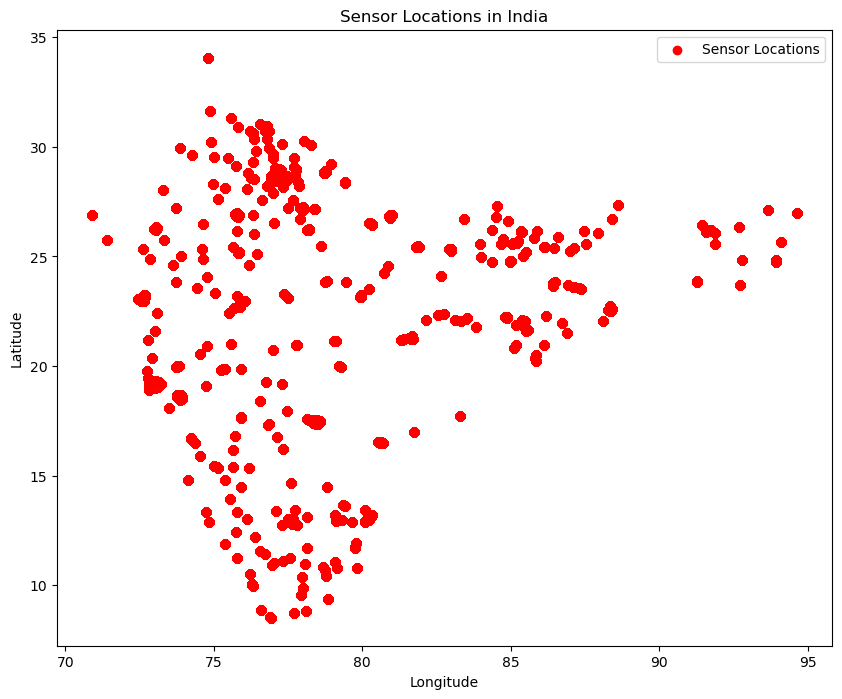

In [30]:
#Q4
data = pd.read_csv("Data.csv")
plt.figure(figsize=(10, 8))

# Extract sensor locations
df_sensors = data.dropna(subset=["latitude", "longitude"])
plt.scatter(df_sensors["longitude"], df_sensors["latitude"], color='red', marker='o', label='Sensor Locations')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sensor Locations in India")
plt.legend()
plt.show()

# Tell us something new

Despite constant higher PM2.5 values in Delhi, no funds has been used. The policy makers should pressure more on the usage of funds